In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prasanthbabu77","key":"36cf9309e9e843d9f4c42405c74c3885"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle competitions download -c digit-recognizer


 91% 14.0M/15.3M [00:00<00:00, 48.3MB/s]
100% 15.3M/15.3M [00:00<00:00, 47.2MB/s]


In [4]:
!unzip digit-recognizer.zip


Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


**Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [6]:
# Load the training and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Separate the labels and features in the training dataset
X = train.drop(columns=['label'])
y = train['label']

# Reshape the images into 28x28 and normalize pixel values to [0, 1]
X = X.values.reshape(-1, 28, 28, 1) / 255.0
test = test.values.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode the labels
y = to_categorical(y, 10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))  # Dropout to prevent overfitting
model.add(Dense(10, activation='softmax'))  # Output layer (10 classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 80ms/step - accuracy: 0.8108 - loss: 0.5957 - val_accuracy: 0.9765 - val_loss: 0.0827
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 77s 70ms/step - accuracy: 0.9748 - loss: 0.0851 - val_accuracy: 0.9838 - val_loss: 0.0536
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.9815 - loss: 0.0607 - val_accuracy: 0.9851 - val_loss: 0.0437
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 38s 69ms/step - accuracy: 0.9865 - loss: 0.0445 - val_accuracy: 0.9862 - val_loss: 0.0453
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.9889 - loss: 0.0370 - val_accuracy: 0.9881 - val_loss: 0.0388
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 43s 63ms/step - accuracy: 0.9908 - loss: 0.0295 - val_accuracy: 0.9880 - val_loss: 0.0372
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.9923 - loss: 0.0250 - val_accuracy: 0.9876 - val_loss: 0.0389
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9934 - loss: 0.0193 - 

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9890 - loss: 0.0341
Validation Accuracy: 99.02%


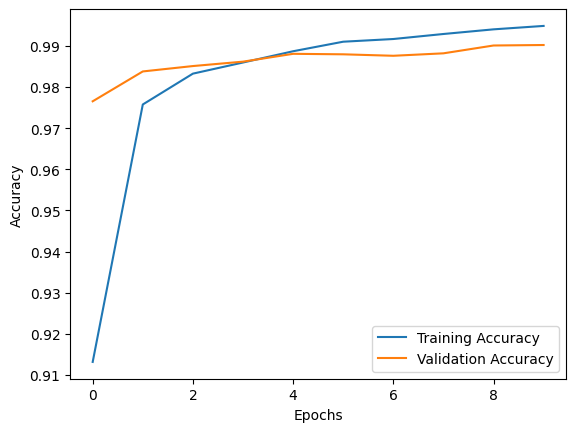

In [9]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Function to plot a few sample images
def plot_sample_images(X_data, num_samples=5):
    plt.figure(figsize=(12, num_samples * 3))

    for i in range(num_samples):
        # Select a random sample index
        idx = np.random.randint(0, len(X_data))

        # Reshape the image data into 28x28 matrix for visualization
        image = X_data[idx].reshape(28, 28)

        # Plot the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Sample {i + 1}")
        plt.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

# Use the function on a subset of test data
plot_sample_images(test, num_samples=5)


263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


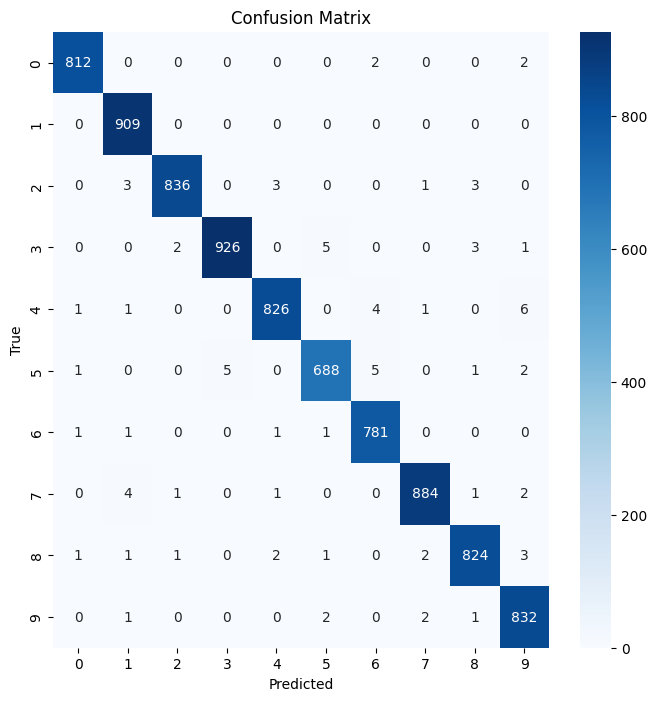

In [10]:
# Make predictions on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# Make predictions on the test data
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)

# Display the predicted labels along with the image IDs
submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels) + 1), 'Label': predicted_labels})

# Show the first few predictions
print(submission.head(10))  # Display the first 10 predictions

# Optionally, display all predictions
# print(submission)


875/875 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [11]:
# Make predictions on the test data
predictions = model.predict(test)
predictions = np.argmax(predictions, axis=1)

# Prepare submission file for Kaggle
submission = pd.DataFrame({'ImageId': np.arange(1, len(predictions) + 1), 'Label': predictions})
submission.to_csv('mnist_submission.csv', index=False)

# Download the submission file
from google.colab import files
files.download('mnist_submission.csv')


875/875 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

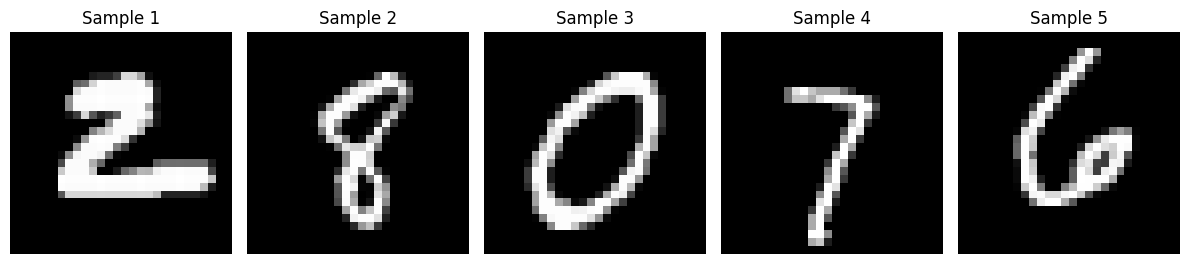

In [14]:
import matplotlib.pyplot as plt

# Function to plot a few sample images
def plot_sample_images(X_data, num_samples=5):
    plt.figure(figsize=(12, num_samples * 3))

    for i in range(num_samples):
        # Select a random sample index
        idx = np.random.randint(0, len(X_data))

        # Reshape the image data into 28x28 matrix for visualization
        image = X_data[idx].reshape(28, 28)

        # Plot the image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Sample {i + 1}")
        plt.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

# Use the function on a subset of test data
plot_sample_images(test, num_samples=5)
